## Bic Vu's Capstone Project
#### ML Guild - Apprentice Cohort 11
#### Notebook 4
2023-06-10

In [1]:
import pandas as pd
import ydata_profiling as pf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import os
# from sklearn.preprocessing import OneHotEncoder

pd.set_option('display.max_columns', None)
pd.set_option("display.precision", 12)

from datetime import date
today = date.today()

In [2]:
df = pd.read_parquet("data/output/all_features_aggZip_2023-06-10")
# df = df.drop(["zip", "pop2018"], axis=1).set_index("census_tract")
df = df.drop("zip", axis=1)
print(df.shape)
df.head()

(14256, 17)


,census_tract,approval,loan_amount,property_value,income,tract_minority_population_percent,income_level,dti_level,derived_race,num_below_p50,ec_zip,nbhd_ec_zip,exposure_grp_mem_zip,nbhd_exposure_zip,clustering_zip,volunteering_rate_zip,civic_organizations_zip
0,25013813204,0.862095897815,201277.371762718569,302607.841576858191,91.437785742412,11.288333333333,middle,50,White,995.787467956543,0.88156998,1.51095000,1.12959,1.50590000,0.105720000,0.056499999,0.0108000000
1,25011040600,0.892316453372,285961.037087271456,438074.101620255213,162.275709825145,20.506250000000,upper,30,White,1312.117076873779,1.18348000,0.97759998,1.36818,1.20281990,0.103400000,0.149510000,0.0368800010
2,25027704200,0.897078689632,243595.350669818785,360452.268377800297,101.489980862321,4.450000000000,middle,50,White,381.519744873047,1.15543000,1.46491000,1.31876,1.46396990,0.105540000,0.158620000,0.0216300000
3,25015820202,0.861290526849,261565.597702565807,391370.493784057617,115.430058668091,8.760000000000,upper,30,White,915.396667480469,1.19240000,1.17985000,1.30741,1.23108990,0.103910000,0.130530000,0.0168999990
4,25013800400,0.809416265856,175619.893285605533,252751.344676762470,75.982170568134,30.257777777778,moderate,42,White,2616.550354003906,0.69744003,0.53930002,0.87842,0.67602003,0.086479999,0.061910000,0.0096899997


In [3]:
# Separate out numeric and categorical data columsn and define type
num_cols = ['approval', 'loan_amount', 'property_value', 'income',
       'tract_minority_population_percent', 'num_below_p50', 'ec_zip', 'nbhd_ec_zip',
       'exposure_grp_mem_zip', 'nbhd_exposure_zip', 'clustering_zip',
       'volunteering_rate_zip', 'civic_organizations_zip']
str_cols = ['census_tract', 'income_level', 'dti_level', 'derived_race']

df[num_cols] = df[num_cols].astype(float)
df[str_cols] = df[str_cols].astype(str)
df.dtypes

census_tract                          object
approval                             float64
loan_amount                          float64
property_value                       float64
income                               float64
tract_minority_population_percent    float64
income_level                          object
dti_level                             object
derived_race                          object
num_below_p50                        float64
ec_zip                               float64
nbhd_ec_zip                          float64
exposure_grp_mem_zip                 float64
nbhd_exposure_zip                    float64
clustering_zip                       float64
volunteering_rate_zip                float64
civic_organizations_zip              float64
dtype: object

### Prep categorical data for model - Encoding

In [4]:
df = pd.get_dummies(df, columns = ["income_level","dti_level", "derived_race"], prefix=["inc_", "dti_", "race"])
df.head()

,census_tract,approval,loan_amount,property_value,income,tract_minority_population_percent,num_below_p50,ec_zip,nbhd_ec_zip,exposure_grp_mem_zip,nbhd_exposure_zip,clustering_zip,volunteering_rate_zip,civic_organizations_zip,inc__low,inc__middle,inc__moderate,inc__nan,inc__upper,dti__100,dti__20,dti__30,dti__36,dti__42,dti__50,dti__60,race_American Indian or Alaska Native,race_Asian,race_Black or African American,race_Joint,race_Native Hawaiian or Other Pacific Islander,race_White
0,25013813204,0.862095897815,201277.371762718569,302607.841576858191,91.437785742412,11.288333333333,995.787467956543,0.88156998,1.51095000,1.12959,1.50590000,0.105720000,0.056499999,0.0108000000,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,25011040600,0.892316453372,285961.037087271456,438074.101620255213,162.275709825145,20.506250000000,1312.117076873779,1.18348000,0.97759998,1.36818,1.20281990,0.103400000,0.149510000,0.0368800010,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,25027704200,0.897078689632,243595.350669818785,360452.268377800297,101.489980862321,4.450000000000,381.519744873047,1.15543000,1.46491000,1.31876,1.46396990,0.105540000,0.158620000,0.0216300000,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,25015820202,0.861290526849,261565.597702565807,391370.493784057617,115.430058668091,8.760000000000,915.396667480469,1.19240000,1.17985000,1.30741,1.23108990,0.103910000,0.130530000,0.0168999990,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
4,25013800400,0.809416265856,175619.893285605533,252751.344676762470,75.982170568134,30.257777777778,2616.550354003906,0.69744003,0.53930002,0.87842,0.67602003,0.086479999,0.061910000,0.0096899997,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


### XGBoost
<p>https://machinelearningmastery.com/xgboost-for-regression/

In [5]:
# check xgboost version
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score

from ray.tune.schedulers import ASHAScheduler
from ray import air, tune
from ray.air import session
from ray.tune.integration.xgboost import TuneReportCheckpointCallback

print(xgb.__version__)

1.7.4


In [6]:
# Define features
X = df.drop(["approval","census_tract"], axis=1)

# Define target
y = df[["approval"]]

### Ray Tune

In [7]:
# Set random seed
seed = random.seed(42)
test_size = 0.3 # 70% will go to train

# split data into train and temporary set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size, random_state=seed)

In [8]:
# split temporary data into test and validation sets
# Final result should be 70% train, 15% test, and 15% validation
test_size = 0.5
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=test_size, random_state=seed)

In [9]:
# https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBRFRegressor

# train_set = xgb.DMatrix(X_train, label=y_train)
# val_set = xgb.DMatrix(X_val, label=y_val)
# test_set = xgb.DMatrix(X_test, label=y_test)

def train_model(config: dict):

    train_set = xgb.DMatrix(X_train, label=y_train)
    val_set = xgb.DMatrix(X_val, label=y_val) ## Don't use test set for training
    test_set = xgb.DMatrix(X_test, label=y_test)

    # Train model using the Tune callback
    xgb.train(
        config,
        train_set,
#         xgb_model=model,
        early_stopping_rounds=10,
        evals=[(val_set, "eval")],
        verbose_eval=False,
        callbacks=[TuneReportCheckpointCallback({"rmse": "eval-rmse"}, filename="model.xgb")]
    ) # "rmse" key should be passed to tune_xgboost function
    

In [10]:
def get_best_model_checkpoint(results):
    best_bst = xgb.Booster()
    best_result = results.get_best_result()
    
    with best_result.checkpoint.as_directory() as best_checkpoint_dir:
        best_bst.load_model(os.path.join(best_checkpoint_dir, "model.xgb"))
    print(best_result.metrics["rmse"])
    print(f"Best model parameters: {best_result.config}")
    return best_bst

In [11]:
# XGBoost doc https://xgboost.readthedocs.io/en/latest/parameter.html#learning-task-parameters

def tune_xgboost(smoke_test=False):
    random.seed(42)
    
    search_space = {
        "objective": "reg:squarederror",
        "eval_metric": "rmse",
        "n_estimators": 300,
        "max_depth": tune.randint(1, 9),
        "colsample_bytree": tune.uniform(0, 1),
        "lambda": tune.uniform(0, 1),
        "alpha": tune.uniform(0, 1)  
    }
    # EARLY STOPPING of bad trials
    scheduler = ASHAScheduler(
        max_t=10, # 10 training iterations. 
        grace_period=1,
        reduction_factor=2
    )
    tuner = tune.Tuner(
        train_model,
        tune_config = tune.TuneConfig(
            metric = "rmse",
            mode="min",
            scheduler=scheduler,
            num_samples=1 if smoke_test else 100, # Try for 100 trials for diff configs. If after 10, no improvement then exit; reference scheduler max_t = 10
        ),
        param_space = search_space,
    )
    
    results = tuner.fit() # fit hyperparameter with best and history of trials

    return results


In [12]:
if __name__ == "__main__":
    import argparse

    parser = argparse.ArgumentParser()
    parser.add_argument(
        "--smoke-test", action="store_true", help="Finish quickly for testing"
    )
    args, _ = parser.parse_known_args()

    results = tune_xgboost(smoke_test=args.smoke_test)

    # Load the best model checkpoint.
    best_bst = get_best_model_checkpoint(results)
    
#     best_bst.predict(test_set)


2023-06-11 21:42:50,353	INFO worker.py:1538 -- Started a local Ray instance.


(train_model pid=82634) [21:43:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035096581/work/src/learner.cc:767: 
(train_model pid=82634) Parameters: { "n_estimators" } are not used.
(train_model pid=82634) 
(train_model pid=82764) [21:43:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035096581/work/src/learner.cc:767: 
(train_model pid=82764) Parameters: { "n_estimators" } are not used.
(train_model pid=82764) 
(train_model pid=82879) [21:43:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035096581/work/src/learner.cc:767: 
(train_model pid=82879) Parameters: { "n_estimators" } are not used.
(train_model pid=82879) 
(train_model pid=82997) [21:43:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035096581/work/src/learner.cc:767: 
(train_model pid=82997) Parameters: { "n_estimators" } are not used.
(train_model pid=82997) 
(train_model pid=83166) [21:43:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split

Trial name,date,done,episodes_total,experiment_id,hostname,iterations_since_restore,node_ip,pid,rmse,time_since_restore,time_this_iter_s,time_total_s,timestamp,timesteps_since_restore,timesteps_total,training_iteration,trial_id,warmup_time
train_model_72e34_00000,2023-06-11_21-44-05,True,,3aae09094d4648b0b532115b72733ac8,USAUSNGVU1,10,127.0.0.1,82634,0.0588313,61.5252,0.011354,61.5252,1686534245,0,,10,72e34_00000,0.00986195
train_model_72e34_00001,2023-06-11_21-43-09,True,,ca6d92306c734d31a7782294039afbee,USAUSNGVU1,1,127.0.0.1,82764,0.236396,0.0431132,0.0431132,0.0431132,1686534189,0,,1,72e34_00001,0.00664973
train_model_72e34_00002,2023-06-11_21-44-06,True,,cc4c537fc898476ba08ca485aa35513f,USAUSNGVU1,10,127.0.0.1,82879,0.0486655,50.5006,0.232079,50.5006,1686534246,0,,10,72e34_00002,0.00562882
train_model_72e34_00003,2023-06-11_21-43-21,True,,950d4769921042e698fac752567ee361,USAUSNGVU1,1,127.0.0.1,82997,0.235384,0.0473769,0.0473769,0.0473769,1686534201,0,,1,72e34_00003,0.00621009
train_model_72e34_00004,2023-06-11_21-44-06,True,,748d4f91036a482baca9d21389244850,USAUSNGVU1,10,127.0.0.1,83166,0.0484238,38.7708,0.353013,38.7708,1686534246,0,,10,72e34_00004,0.00657415
train_model_72e34_00005,2023-06-11_21-43-33,True,,c2ee8c4a64c94dfab338bd1587dd2efd,USAUSNGVU1,1,127.0.0.1,83270,0.235337,0.0453258,0.0453258,0.0453258,1686534213,0,,1,72e34_00005,0.00542903
train_model_72e34_00006,2023-06-11_21-44-05,True,,4024b26ba3304ff8bfc2e4c7920a7493,USAUSNGVU1,8,127.0.0.1,83275,0.0545888,27.4612,0.016865,27.4612,1686534245,0,,8,72e34_00006,0.00685716
train_model_72e34_00007,2023-06-11_21-44-06,True,,d204352090ef4f21b1528dc17824e363,USAUSNGVU1,8,127.0.0.1,83284,0.0524591,23.1137,0.0752649,23.1137,1686534246,0,,8,72e34_00007,0.00549102
train_model_72e34_00008,2023-06-11_21-43-48,True,,a55c3f60364f46d3ad8cdc6aa8bbd4a9,USAUSNGVU1,1,127.0.0.1,83289,0.236424,0.036087,0.036087,0.036087,1686534228,0,,1,72e34_00008,0.00614977
train_model_72e34_00009,2023-06-11_21-44-04,True,,2cb0c982b68242e18eb848a27307d168,USAUSNGVU1,2,127.0.0.1,83294,0.169605,11.1416,11.0868,11.1416,1686534244,0,,2,72e34_00009,0.00640798


(train_model pid=82764) [21:44:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035096581/work/src/learner.cc:767: 
(train_model pid=82764) Parameters: { "n_estimators" } are not used.
(train_model pid=82764) 
(train_model pid=83289) [21:44:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035096581/work/src/learner.cc:767: 
(train_model pid=83289) Parameters: { "n_estimators" } are not used.
(train_model pid=83289) 
(train_model pid=83270) [21:44:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035096581/work/src/learner.cc:767: 
(train_model pid=83270) Parameters: { "n_estimators" } are not used.
(train_model pid=83270) 
(train_model pid=83294) [21:44:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035096581/work/src/learner.cc:767: 
(train_model pid=83294) Parameters: { "n_estimators" } are not used.
(train_model pid=83294) 
(train_model pid=82997) [21:44:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split

(train_model pid=83294) [21:44:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035096581/work/src/learner.cc:767: 
(train_model pid=83294) Parameters: { "n_estimators" } are not used.
(train_model pid=83294) 
(train_model pid=82879) [21:44:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035096581/work/src/learner.cc:767: 
(train_model pid=82879) Parameters: { "n_estimators" } are not used.
(train_model pid=82879) 
(train_model pid=83270) [21:44:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035096581/work/src/learner.cc:767: 
(train_model pid=83270) Parameters: { "n_estimators" } are not used.
(train_model pid=83270) 
(train_model pid=83294) [21:44:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035096581/work/src/learner.cc:767: 
(train_model pid=83294) Parameters: { "n_estimators" } are not used.
(train_model pid=83294) 
(train_model pid=83294) [21:44:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split

(train_model pid=82634) [21:44:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035096581/work/src/learner.cc:767: 
(train_model pid=82634) Parameters: { "n_estimators" } are not used.
(train_model pid=82634) 
(train_model pid=82634) [21:44:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035096581/work/src/learner.cc:767: 
(train_model pid=82634) Parameters: { "n_estimators" } are not used.
(train_model pid=82634) 
(train_model pid=83313) [21:44:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035096581/work/src/learner.cc:767: 
(train_model pid=83313) Parameters: { "n_estimators" } are not used.
(train_model pid=83313) 
(train_model pid=83313) [21:44:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1679035096581/work/src/learner.cc:767: 
(train_model pid=83313) Parameters: { "n_estimators" } are not used.
(train_model pid=83313) 
(train_model pid=83313) [21:44:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split

0.04585943734212902
Best model parameters: {'objective': 'reg:squarederror', 'eval_metric': 'rmse', 'n_estimators': 300, 'max_depth': 6, 'colsample_bytree': 0.8171484335790162, 'lambda': 0.6673997656918179, 'alpha': 0.03305586345304068}


### Create predictions and compare with actuals

In [65]:
# Create new regression model with best model parameters
# 0.04585943734212902
# Best model parameters: {'objective': 'reg:squarederror', 'eval_metric': 'rmse', 'n_estimators': 300, 'max_depth': 6, 'colsample_bytree': 0.8171484335790162, 'lambda': 0.6673997656918179, 'alpha': 0.03305586345304068}

# Model using best model feature

model = XGBRegressor(
    n_estimators=300,
    max_depth = 6,
    random_state = seed,
    early_stopping_rounds=10
    )

model = model.fit(X_train, y_train, eval_set=[(X_val, y_val)])

[0]	validation_0-rmse:0.23443
[1]	validation_0-rmse:0.16778
[2]	validation_0-rmse:0.12254
[3]	validation_0-rmse:0.09210
[4]	validation_0-rmse:0.07235
[5]	validation_0-rmse:0.06027
[6]	validation_0-rmse:0.05334
[7]	validation_0-rmse:0.04941
[8]	validation_0-rmse:0.04708
[9]	validation_0-rmse:0.04585
[10]	validation_0-rmse:0.04525
[11]	validation_0-rmse:0.04492
[12]	validation_0-rmse:0.04468
[13]	validation_0-rmse:0.04448
[14]	validation_0-rmse:0.04436
[15]	validation_0-rmse:0.04431
[16]	validation_0-rmse:0.04424
[17]	validation_0-rmse:0.04431
[18]	validation_0-rmse:0.04431
[19]	validation_0-rmse:0.04431
[20]	validation_0-rmse:0.04435
[21]	validation_0-rmse:0.04439
[22]	validation_0-rmse:0.04425
[23]	validation_0-rmse:0.04424
[24]	validation_0-rmse:0.04429
[25]	validation_0-rmse:0.04430
[26]	validation_0-rmse:0.04429
[27]	validation_0-rmse:0.04426
[28]	validation_0-rmse:0.04427
[29]	validation_0-rmse:0.04427
[30]	validation_0-rmse:0.04419
[31]	validation_0-rmse:0.04417
[32]	validation_0-

In [66]:
predictions = model.predict(X_test)

In [25]:
# train_set = xgb.DMatrix(X_train, label=y_train)
# val_set = xgb.DMatrix(X_val, label=y_val) ## Don't use test set for training
# test_set = xgb.DMatrix(X_test, label=y_test)

# predictions = best_bst.predict(test_set)

In [72]:
actual_pred = y_test.reset_index(drop=True)
actual_pred["predictions"] = predictions
actual_pred["residual"] = abs(actual_pred["approval"]-actual_pred["predictions"])
actual_pred.to_csv("data/output/actual_prediction_RayTune"+str(today)+".csv")
actual_pred

,approval,predictions,diff,residual
0,0.895380020950,0.862671554089,0.032708466861,0.032708466861
1,0.867786484239,0.858738243580,0.009048240659,0.009048240659
2,0.764358608953,0.767650842667,0.003292233713,0.003292233713
3,0.840892894975,0.864509522915,0.023616627940,0.023616627940
4,0.942961529680,0.886697411537,0.056264118143,0.056264118143
...,...,...,...,...
2133,0.838462070262,0.867152214050,0.028690143788,0.028690143788
2134,0.847558521002,0.820919275284,0.026639245718,0.026639245718
2135,0.666475749498,0.697709858418,0.031234108919,0.031234108919
2136,0.917365110475,0.889772236347,0.027592874128,0.027592874128


In [75]:
top = actual_pred[:5]
bottom = actual_pred[-5:]
X_test_tb = pd.concat([top, bottom])
X_test_tb

,approval,predictions,residual
0,0.895380020950,0.862671554089,0.032708466861
1,0.867786484239,0.858738243580,0.009048240659
2,0.764358608953,0.767650842667,0.003292233713
3,0.840892894975,0.864509522915,0.023616627940
4,0.942961529680,0.886697411537,0.056264118143
2133,0.838462070262,0.867152214050,0.028690143788
2134,0.847558521002,0.820919275284,0.026639245718
2135,0.666475749498,0.697709858418,0.031234108919
2136,0.917365110475,0.889772236347,0.027592874128
2137,0.886631572168,0.881718993187,0.004912578981


### RMSE

In [31]:
from sklearn.metrics import mean_squared_error
actuals = actual_pred["approval"]
predictions = actual_pred["predictions"]
mse = mean_squared_error(actuals, predictions)
print("MSE: %f" % (mse))

MSE: 0.001860


In [35]:
rmse = np.sqrt(mean_squared_error(actuals, predictions))
print("RMSE: %f" % (rmse))

RMSE: 0.043132


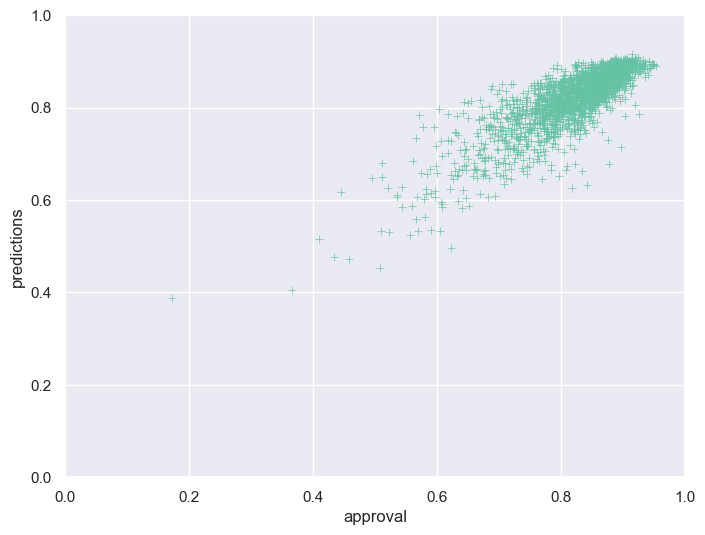

In [56]:
# scatter plot. x = true value, y = predictions
from datetime import date
today = date.today()

fig, ax = plt.subplots(figsize=(8, 6))
plt.xlim(0,1)
plt.ylim(0,1)

sns.set_theme()
sns.set_palette("Set2")

actuals = actual_pred["approval"]
predictions = actual_pred["predictions"]
scatter = sns.scatterplot(data=actual_pred, x=actuals, y=predictions, marker="+")
# scatter.figure.savefig("charts/charts_final/scatter_actuals-predictions_RayTune-"+str(today)+".png")

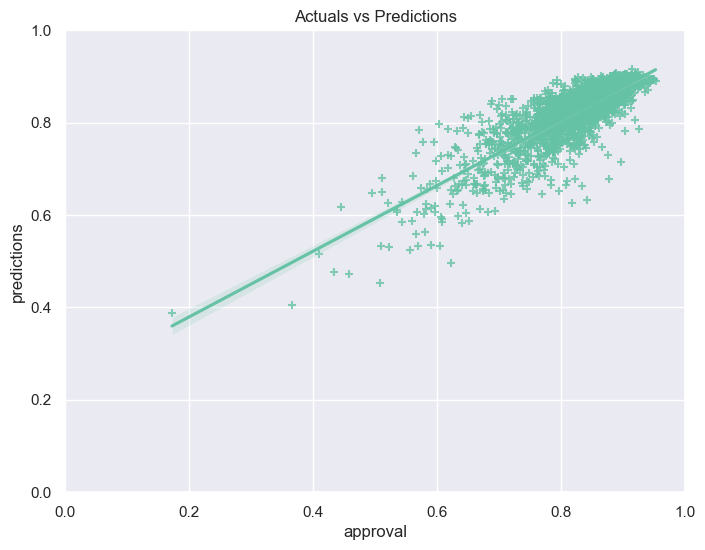

In [38]:
actual_pred = X_test_sel

fig, ax = plt.subplots(figsize=(8, 6))
plt.xlim(0,1)
plt.ylim(0,1)

sns.set_theme()
sns.set_palette("Set2")

# sns.title("Actuals vs Predictions")
actuals = actual_pred["approval"]
predictions = actual_pred["predictions"]
reg_scatter = sns.regplot(data = actual_pred, x="approval", y="predictions", marker="+")
reg_scatter.set(title='Actuals vs Predictions')
reg_scatter.figure.savefig("charts/charts_final/reg_actuals-predictions-RayTune"+str(today)+".png")

### Shap

In [39]:
# SHAP value to explain model
# plot beeswarm of features
# plot force plot for 5 best (smallest diff between prediction and actual) and 5 worst predictions (largest diff)

import shap
shap.initjs()
# shap.image_plot(shap_values, pixel_values=None, labels=None, width=20, aspect=0.2, hspace=0.2, labelpad=None, show=True)

In [40]:
explainer = shap.Explainer(best_bst, X_train) # to get feature importance, and use to explain test sample
test_shap_values = explainer(X_test)

In [41]:
# explainer = shap.Explainer(model, X_train) # to get feature importance, and use to explain test sample
# test_shap_values = explainer(X_test) # use explainer to interpret test

In [42]:
print(X_test_tb.index)
top_index = X_test_tb.index[0:5]
print(top_index)
bottom_index = X_test_tb.index[5:10]
bottom_index

Int64Index([0, 1, 2, 3, 4, 2133, 2134, 2135, 2136, 2137], dtype='int64')
Int64Index([0, 1, 2, 3, 4], dtype='int64')


Int64Index([2133, 2134, 2135, 2136, 2137], dtype='int64')

### Visualize best predictions

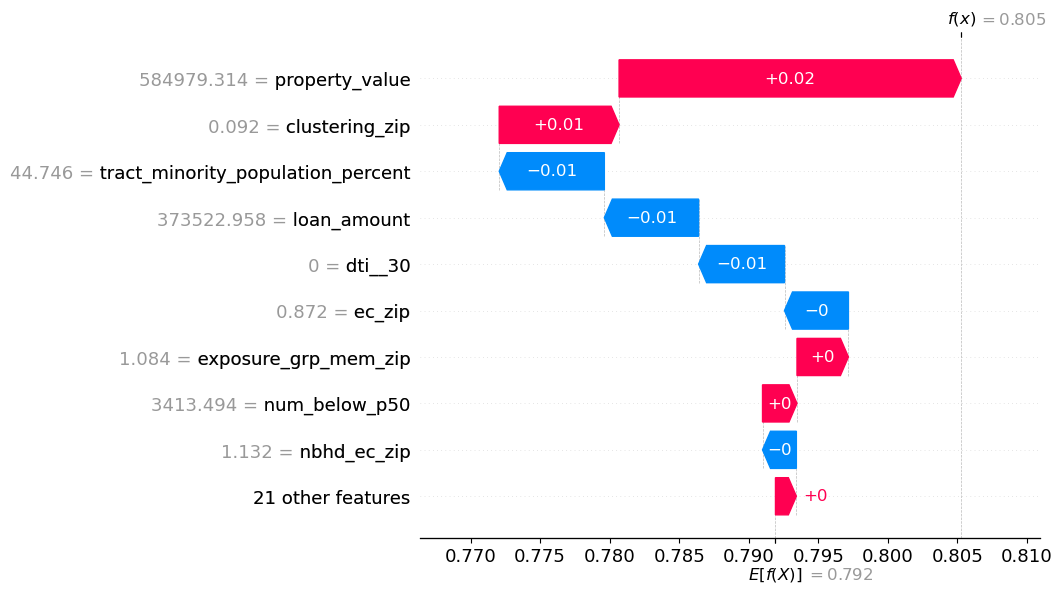

In [43]:
# Reset matplotlib styles
plt.rcdefaults()

### BEST PREDICTION
# Visualize the first predictions's explaination

# for i in range(len(top_index)):
#     print(top_index[i])
#     shap.plots.waterfall(test_shap_values[top_index[i]])
#     shap.plots.force(test_shap_values[top_index[i]])
    
shap.plots.waterfall(test_shap_values[top_index[0]])
shap.plots.force(test_shap_values[top_index[0]])

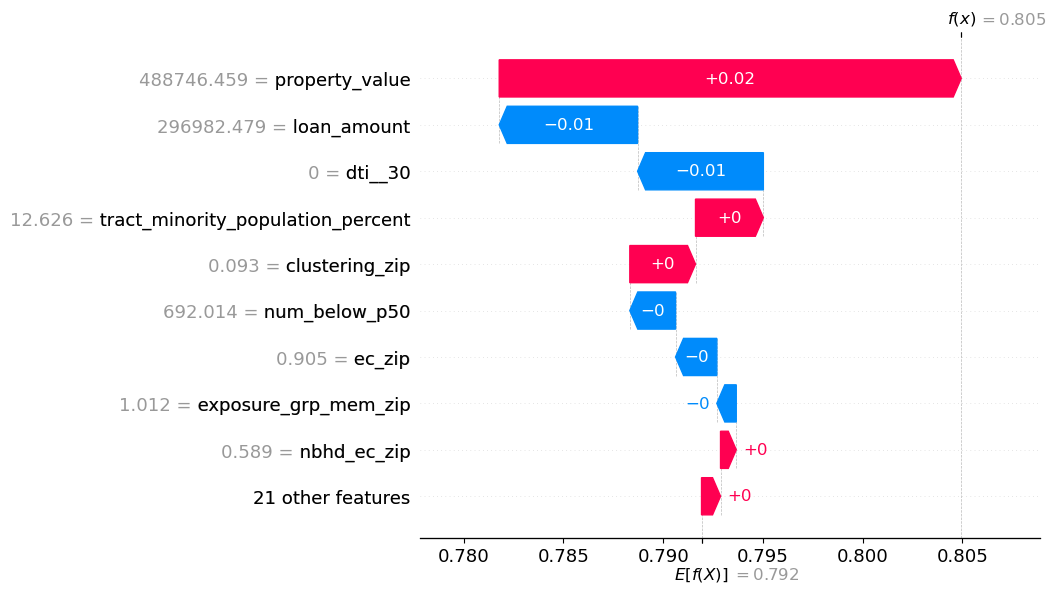

In [44]:
shap.plots.waterfall(test_shap_values[top_index[1]])
shap.plots.force(test_shap_values[top_index[1]])

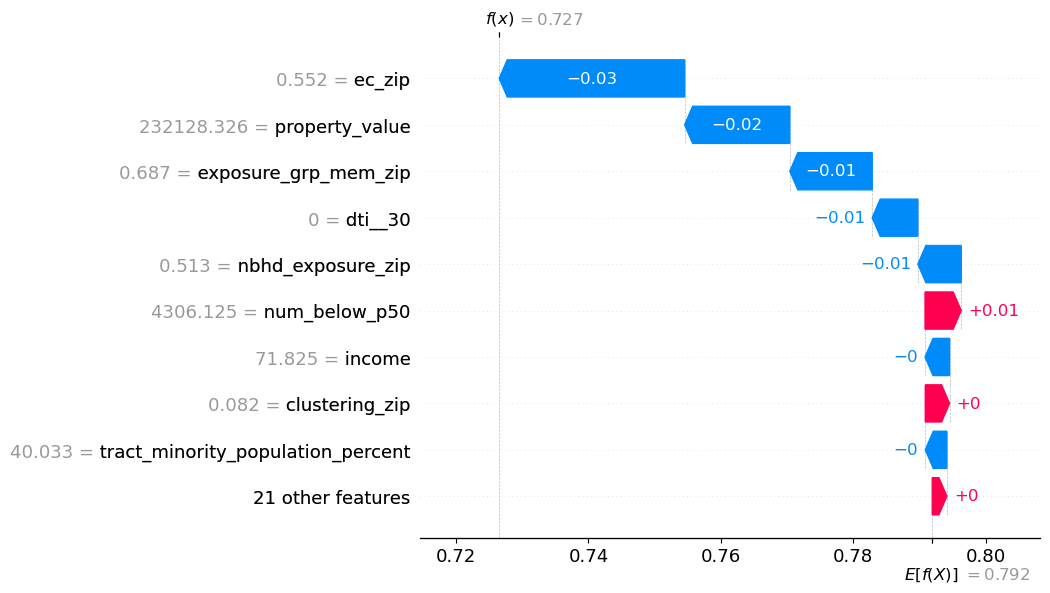

In [45]:
shap.plots.waterfall(test_shap_values[top_index[2]])
shap.plots.force(test_shap_values[top_index[2]])

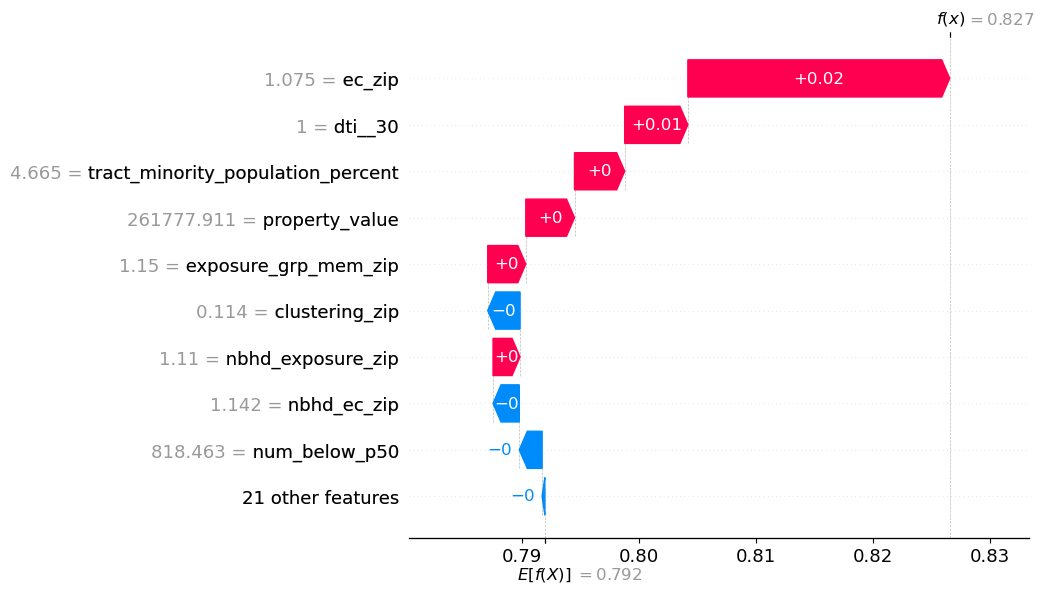

In [46]:
shap.plots.waterfall(test_shap_values[top_index[3]])
shap.plots.force(test_shap_values[top_index[3]])

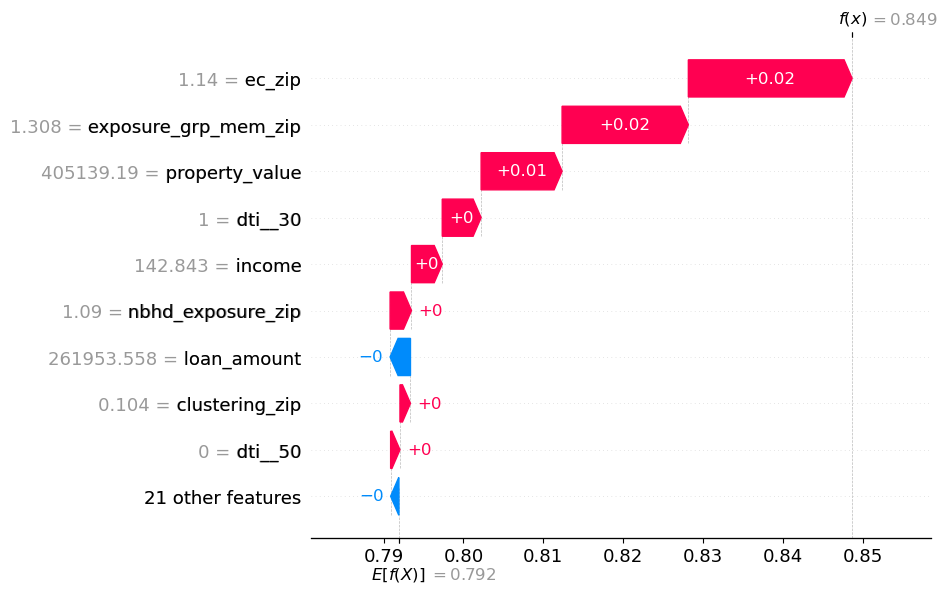

In [47]:
shap.plots.waterfall(test_shap_values[top_index[4]])
shap.plots.force(test_shap_values[top_index[4]])

### Visualize worst predictions

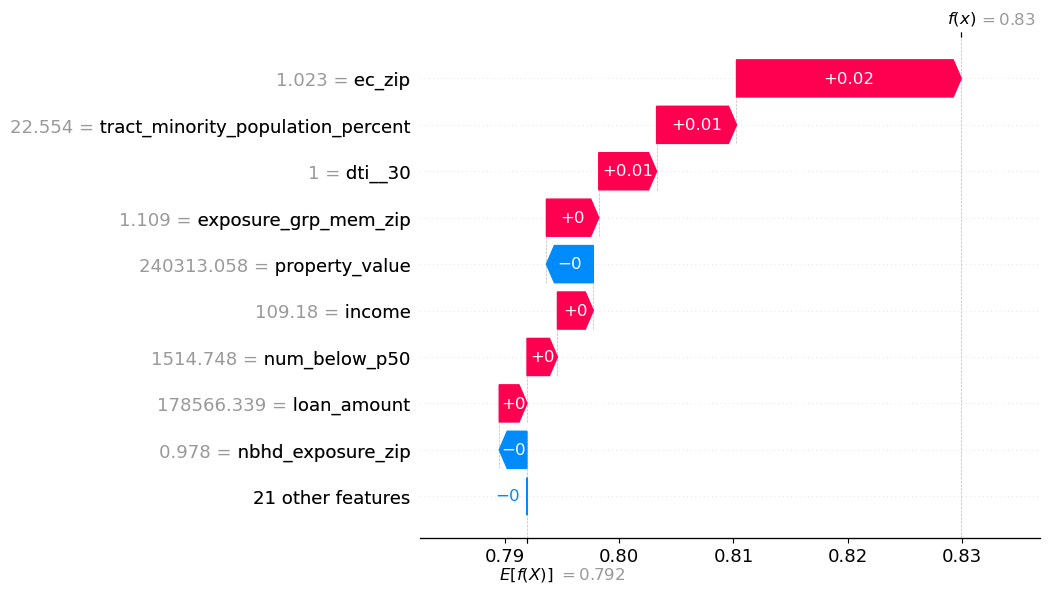

In [48]:
shap.plots.waterfall(test_shap_values[bottom_index[0]])
shap.plots.force(test_shap_values[bottom_index[0]])

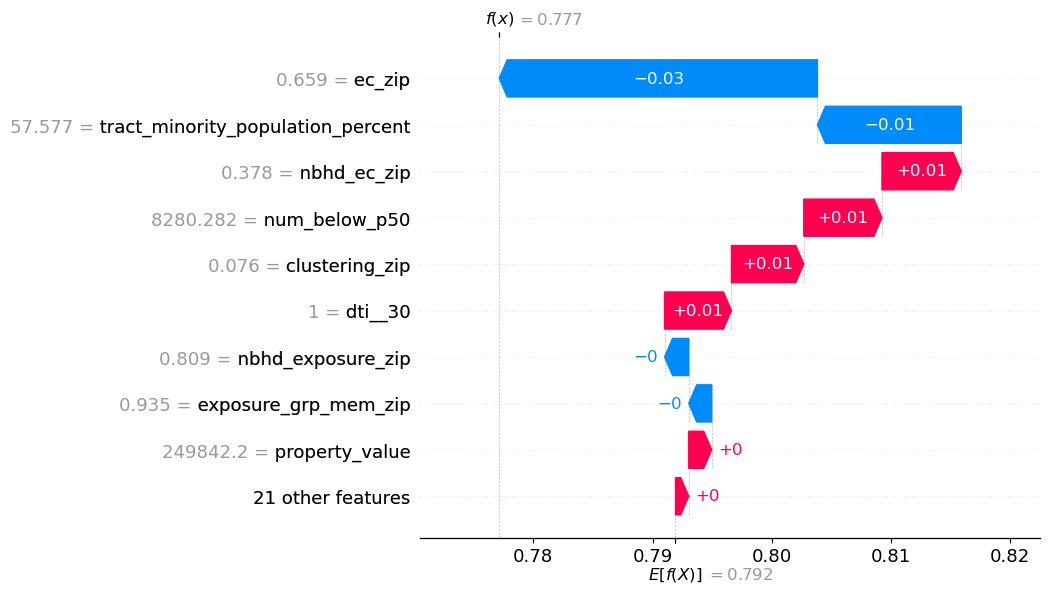

In [49]:
shap.plots.waterfall(test_shap_values[bottom_index[1]])
shap.plots.force(test_shap_values[bottom_index[1]])


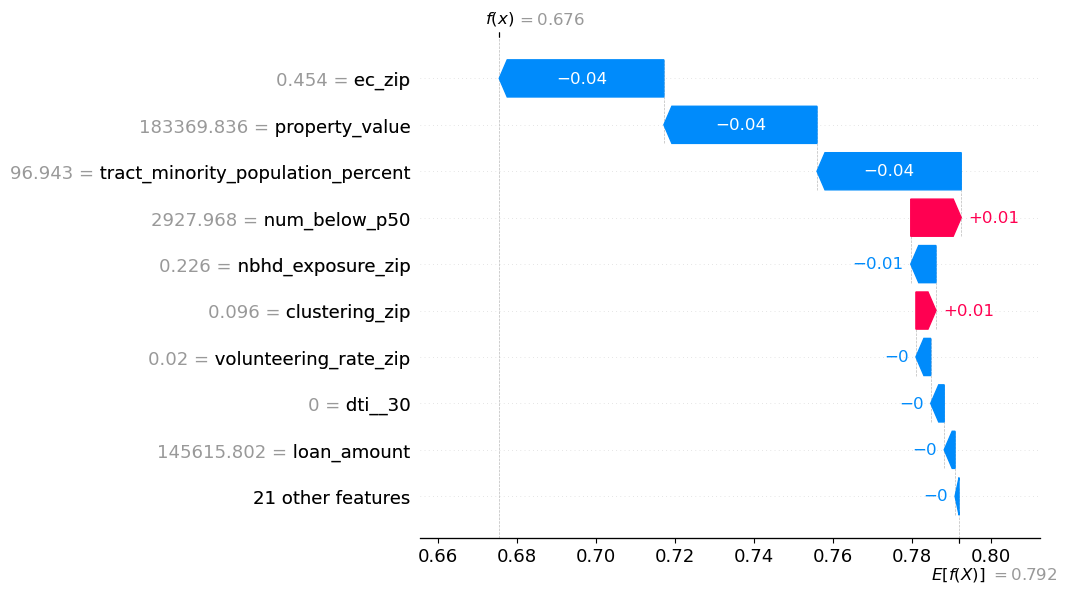

In [50]:
shap.plots.waterfall(test_shap_values[bottom_index[2]])
shap.plots.force(test_shap_values[bottom_index[2]])


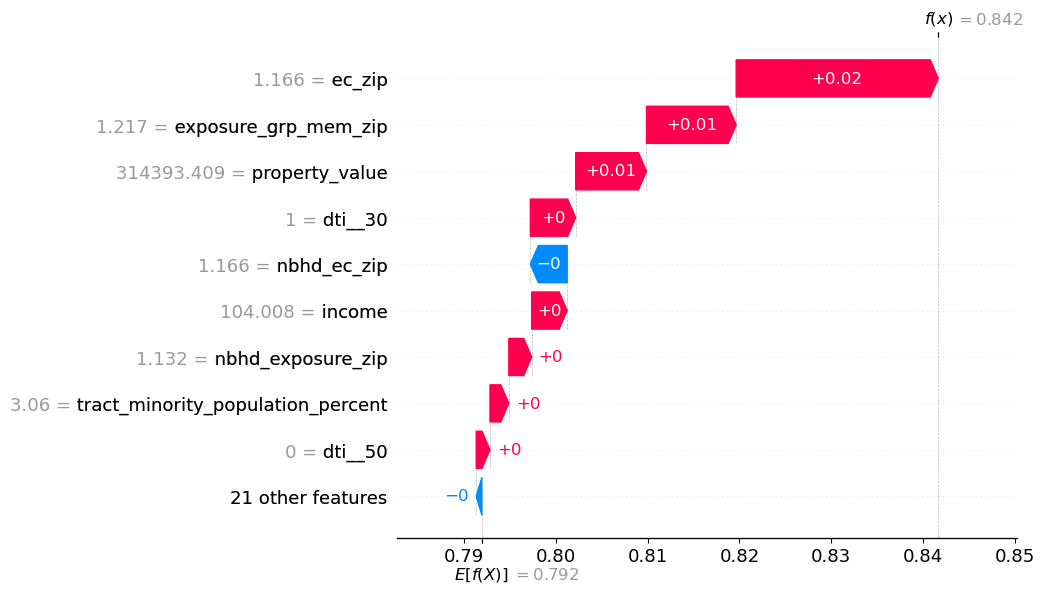

In [51]:
shap.plots.waterfall(test_shap_values[bottom_index[3]])
shap.plots.force(test_shap_values[bottom_index[3]])


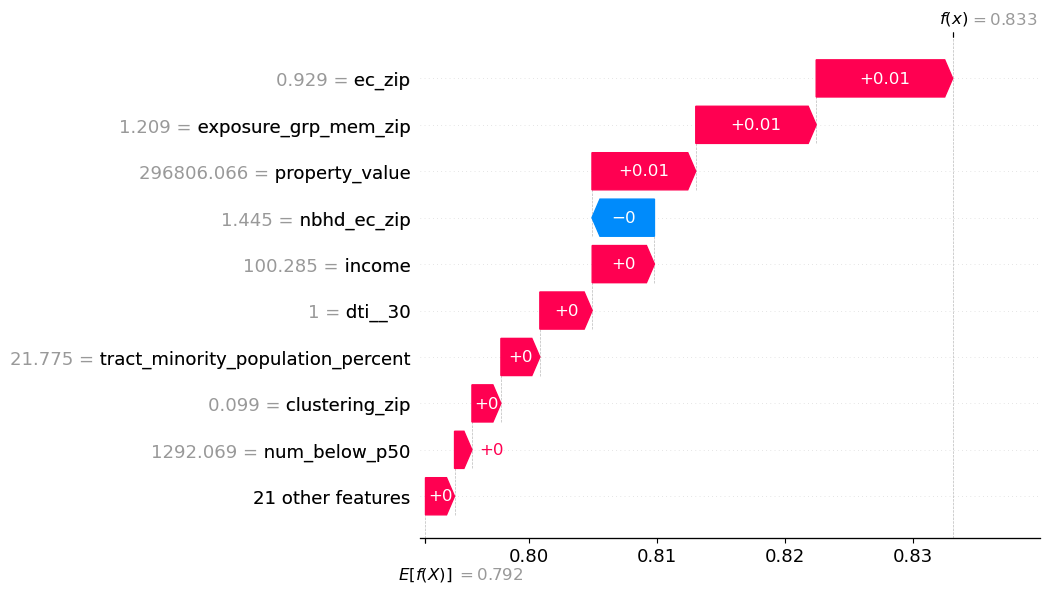

In [52]:
shap.plots.waterfall(test_shap_values[bottom_index[4]])
shap.plots.force(test_shap_values[bottom_index[4]])


### SHAP Summaries

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


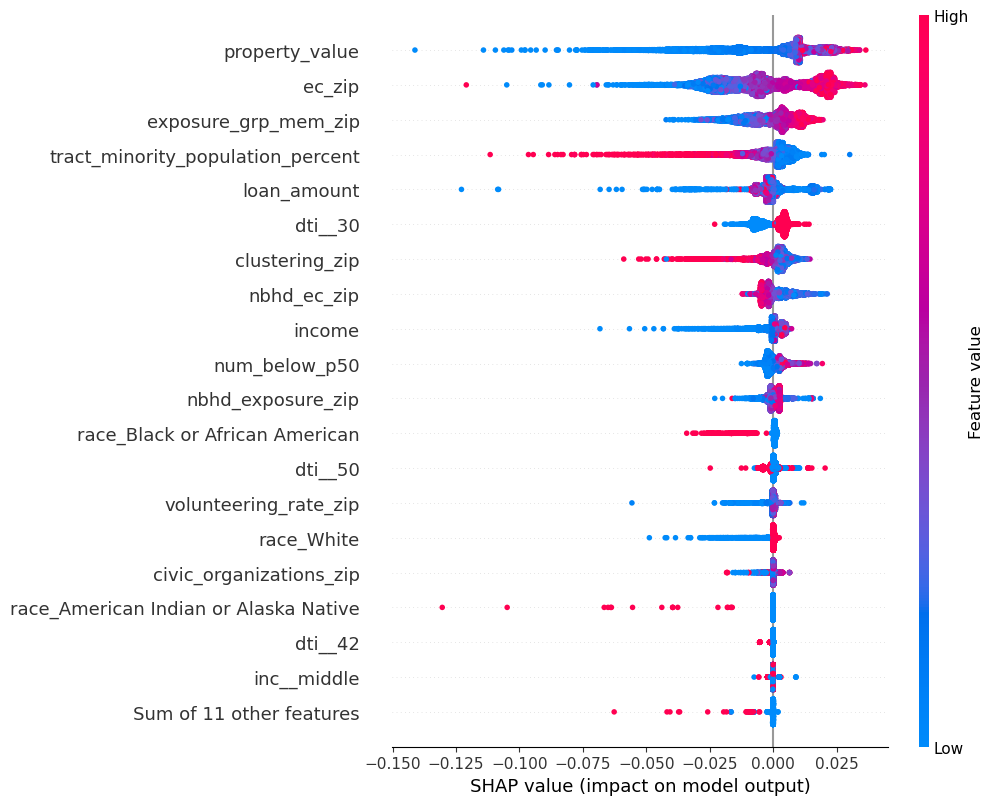

In [53]:
# Beeswarm
train_shap_values = explainer(X_train)
shap.plots.beeswarm(train_shap_values, max_display=20)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


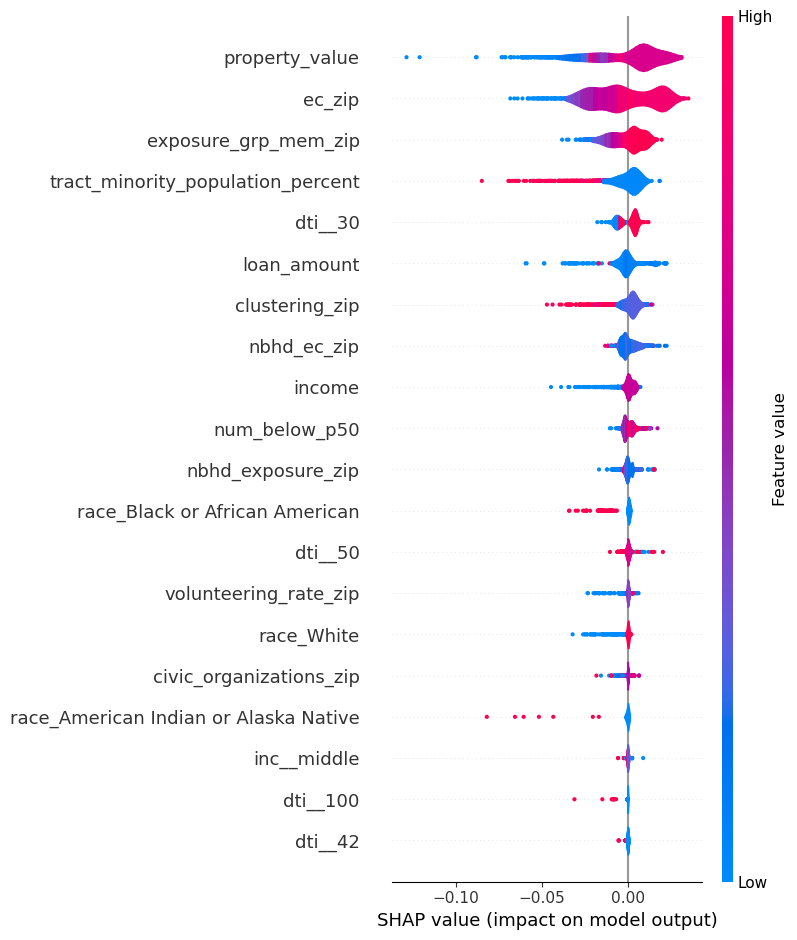

In [54]:
# Violin plot shows similar results with some segment colors blended together
shap.summary_plot(test_shap_values, plot_type="violin")
